In [1]:
%reload_ext autoreload
%autoreload 2

# Static potential

In [2]:

#!/usr/bin/env python
# -*- coding:utf-8 -*-
#
# Created: 06/2023
# Author: Carmelo Mordini <cmordini@phys.ethz.ch>


import numpy as np
from pytrans import objectives as obj
from pytrans.conversion import freq_to_curv
from pytrans.ions import Ca40
from pytrans.functions import zpspace
from pytrans.solver import solver, init_waveform

from models.segmented_trap import SegmentedTrap

from pathlib import Path
data_dir = Path('.').resolve() / 'data'

trap = SegmentedTrap()

axial = freq_to_curv(1e6, ion=Ca40)
rtilt = 2e7

n_samples = 1
r0 = (0, 0, trap.z0)
ion = Ca40

waveform = init_waveform(n_samples, trap.n_electrodes)

objectives = [
    obj.GradientObjective(waveform[0], trap, *r0, value=0, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='xx', value=axial, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='yz', value=rtilt, ion=Ca40),
]


objectives += [
    obj.VoltageObjective(waveform, 0),  # minimize voltages
    obj.VoltageObjective(waveform, 10, constraint_type='<='),
    obj.VoltageObjective(waveform, -10, constraint_type='>='),
]

_ = solver(objectives, verbose=True)
waveform = waveform.value  # get array from cvxpy variable

savename = data_dir / 'waveform_static_segmented_trap.npy'
print(f"Saving waveform as ndarray to {savename}")
np.save(savename, waveform)


Compiling objectives: 100%|██████████| 6/6 [00:00<00:00, 710.38it/s]

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Jun 22 10:57:02 AM: Your problem has 6 variables, 2 constraints, and 0 parameters.
(CVXPY) Jun 22 10:57:02 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 22 10:57:02 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 22 10:57:02 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 22 10:57:02 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Jun 22 10:57:02 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

(CVXPY) Jun 22 10:57:02 AM: Optimizer  - Cones                  : 4
(CVXPY) Jun 22 10:57:02 AM: Optimizer  - Scalar variables       : 31                conic                  : 19              
(CVXPY) Jun 22 10:57:02 AM: Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
(CVXPY) Jun 22 10:57:02 AM: Factor     - setup time             : 0.00              dense det. time        : 0.00            
(CVXPY) Jun 22 10:57:02 AM: Factor     - ML order time          : 0.00              GP order time          : 0.00            
(CVXPY) Jun 22 10:57:02 AM: Factor     - nonzeros before factor : 49                after factor           : 55              
(CVXPY) Jun 22 10:57:02 AM: Factor     - dense dim.             : 0                 flops                  : 8.79e+02        
(CVXPY) Jun 22 10:57:02 AM: ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
(CVXPY) Jun 22 10:57:02 AM: 0   1.0e+00  3.4e+08  5.0e

## Analysis

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[-0.0023 -0.0013  0.0026]
Gradient [V/m]
[-0.0371 -0.0955  0.3508]
Displacement at 1 MHz [um]
[-0.0023 -0.0058  0.0215]
Hessian [V/m2]
[[ 1.6351e+07 -5.6031e+04  3.8635e+04]
 [-5.6031e+04  1.1725e+08  2.0000e+07]
 [ 3.8635e+04  2.0000e+07  1.4370e+08]]
Normal mode frequencies [MHz]
[1 2.55209 3.0734]
Eigenvectors
[[1 0.000635 -0.000403]
 [0.00075 -0.881 0.474]
 [5.43e-05 0.474 0.881]]
Tilt angle of mode 2 (3.07): 61.74°

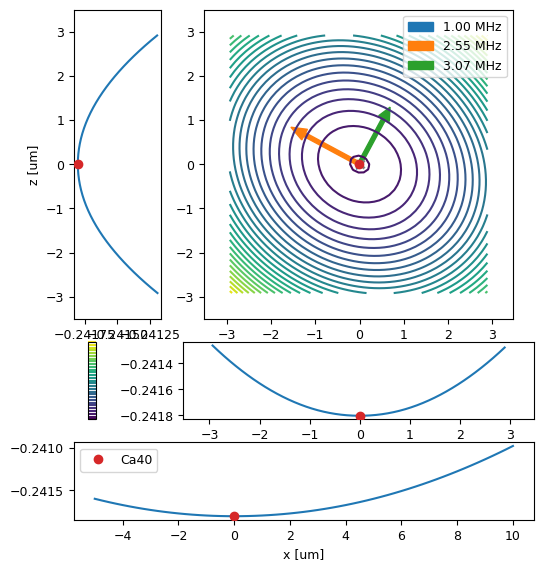

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from models.segmented_trap import SegmentedTrap
from models.segmented_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout, plot_potential

from pytrans.ions import Ca40

trap = SegmentedTrap()
waveform = np.load(data_dir / 'waveform_static_segmented_trap.npy')

r0 = (0, 0, trap.z0)
roi = ((-5e-6, 10e-6), 3.5e-6, 3.5e-6)
res = analyse_potential(trap, voltages=waveform[0], ions=Ca40, r0=r0, roi=roi, verbose=False)
res


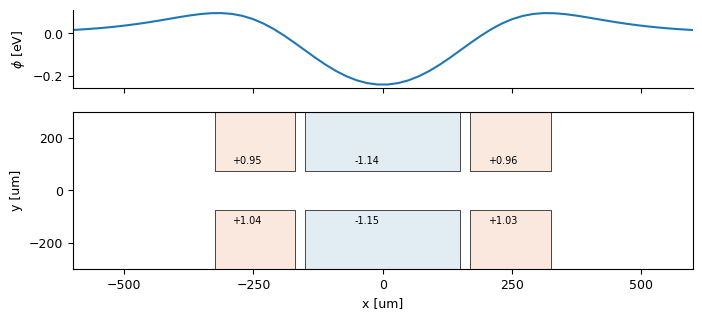

In [4]:
_ = plot_voltages_on_trap(trap, waveform[0])


## Mixed-species ion crystal

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[-0.0005 -0.0015  0.002 ]
Gradient [V/m]
[-0.0083 -0.1383  0.261 ]
Displacement at 1 MHz [um]
[-0.0005 -0.0085  0.016 ]
Hessian [V/m2]
[[ 1.6351e+07 -5.6168e+04  3.8721e+04]
 [-5.6168e+04  1.1726e+08  2.0000e+07]
 [ 3.8721e+04  2.0000e+07  1.4370e+08]]
Normal mode frequencies [MHz]
[0.999999 2.55214 3.07341]
Eigenvectors
[[1 0.000637 -0.000404]
 [0.000752 -0.881 0.474]
 [5.43e-05 0.474 0.881]]
Tilt angle of mode 2 (3.07): 61.73°
--------------
Mode solver analysis for ion crystal [Be9, Ca40, Ca40, Be9]: 
Equilibrium positions [um]
[[-6.3852 -0.004  -0.0462]
 [-2.0254 -0.0031  0.0092]
 [ 2.0096  0.0008  0.0069]
 [ 6.3592 -0.0008 -0.0498]]
Normal modes
  Freq [MHz]                     Be9                                Ca40                                Ca40                                 Be9
------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ------

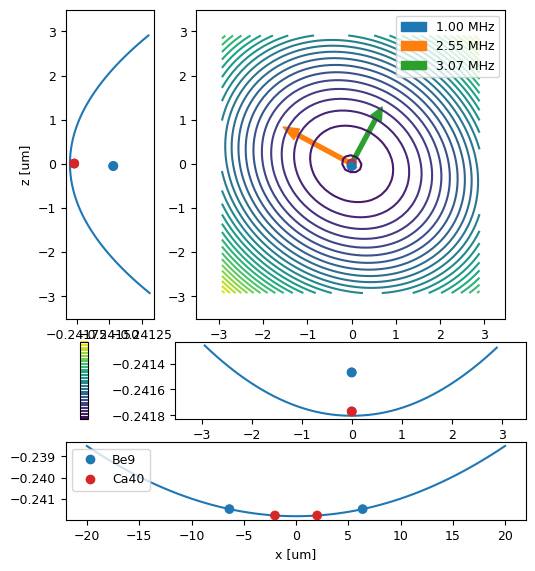

In [5]:
from pytrans.ions import Ca40, Be9
from pytrans.analysis import analyse_potential

r0 = (0, 0, trap.z0)
roi = (20e-6, 3.5e-6, 3.5e-6)

ions = [Be9, Ca40, Ca40, Be9]
res = analyse_potential(trap, voltages=waveform[0], ions=ions, ion1=Ca40, r0=r0, roi=roi, verbose=False)
res

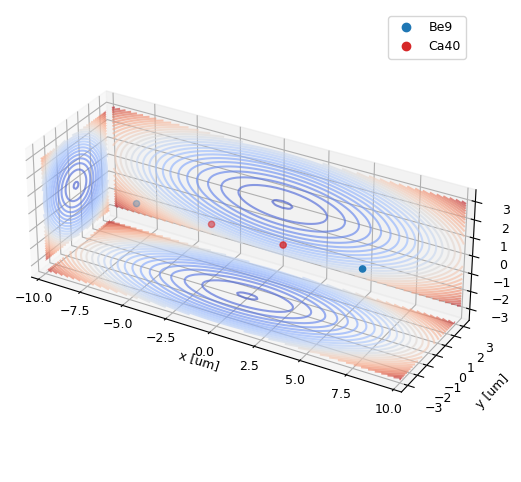

In [6]:
from pytrans.plotting import plot3d_potential

roi = (10e-6, 3.5e-6, 3.5e-6)
_ = plot3d_potential(trap, waveform[0], Ca40, r0, roi, analyse_results=res)